In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Convert all columns to numeric values

In [5]:
df.loc[df['Sex'] == 'M', 'Sex'] = 0
df.loc[df['Sex'] == 'F', 'Sex'] = 1

In [6]:
df.loc[df['ChestPainType'] == 'TA', 'ChestPainType'] = 3
df.loc[df['ChestPainType'] == 'ATA', 'ChestPainType'] = 2
df.loc[df['ChestPainType'] == 'NAP', 'ChestPainType'] = 1
df.loc[df['ChestPainType'] == 'ASY', 'ChestPainType'] = 0

In [7]:
df.loc[df['RestingECG'] == 'ST', 'RestingECG'] = 2
df.loc[df['RestingECG'] == 'LVH', 'RestingECG'] = 1
df.loc[df['RestingECG'] == 'Normal', 'RestingECG'] = 0

In [8]:
df.loc[df['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 1
df.loc[df['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 0

In [9]:
df.loc[df['ST_Slope'] == 'Down', 'ST_Slope'] = 2
df.loc[df['ST_Slope'] == 'Flat', 'ST_Slope'] = 1
df.loc[df['ST_Slope'] == 'Up', 'ST_Slope'] = 0

In [10]:
# coerce all data types to numerics
df = df.apply(pd.to_numeric, errors='coerce')

In [11]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

Separate and normalize the data

In [54]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [56]:
# Split training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [57]:
xtrain = xtrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

In [58]:
# Feature scaling - convert all features to z-scores
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

Train the model

In [59]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [61]:
model = Sequential(
    [
        Input(shape=(11,), name='input'),
        Dense(units=15, activation=LeakyReLU(negative_slope=0.1), name='h1'),
        Dense(units=3, activation=LeakyReLU(negative_slope=0.1), name='h2'),
        Dense(units=1, activation='sigmoid',  name='out')
    ]
)

In [62]:
model.compile(optimizer=Adam(learning_rate=0.0008), loss=BinaryCrossentropy(), metrics=['accuracy', 'precision', 'recall'])
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [63]:
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=250, callbacks=[stop])

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5761 - loss: 0.7557 - precision: 0.6575 - recall: 0.5185 - val_accuracy: 0.5870 - val_loss: 0.7447 - val_precision: 0.6413 - val_recall: 0.5784
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6473 - loss: 0.7162 - precision: 0.7296 - recall: 0.6105 - val_accuracy: 0.6359 - val_loss: 0.6879 - val_precision: 0.6882 - val_recall: 0.6275
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6761 - loss: 0.6494 - precision: 0.7399 - recall: 0.6610 - val_accuracy: 0.6739 - val_loss: 0.6430 - val_precision: 0.7283 - val_recall: 0.6569
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7108 - loss: 0.6114 - precision: 0.7735 - recall: 0.6918 - val_accuracy: 0.7174 - val_loss: 0.6048 - val_precision: 0.7660 - val_recall: 0.7059
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7368 - loss: 0.5765 - precision: 0.7930 - recall: 0.7215 - val_accuracy: 0.7337 - val_loss: 0.57

Performance

In [64]:
import matplotlib.pyplot as plt

In [65]:
print(f"training loss={history.history['loss'][-1]}, training accuracy= {history.history['accuracy'][-1]}, training precision={history.history['precision'][-1]}, training recall={history.history['recall'][-1]}")
print(f"validation loss={history.history['val_loss'][-1]}, validation accuracy= {history.history['val_accuracy'][-1]}, validation precision={history.history['val_precision'][-1]}, validation recall={history.history['val_recall'][-1]}")

training loss=0.2305029034614563, training accuracy= 0.9019073843955994, training precision=0.8976190686225891, training recall=0.9285714030265808
validation loss=0.32825344800949097, validation accuracy= 0.8913043737411499, validation precision=0.8796296119689941, validation recall=0.9313725233078003


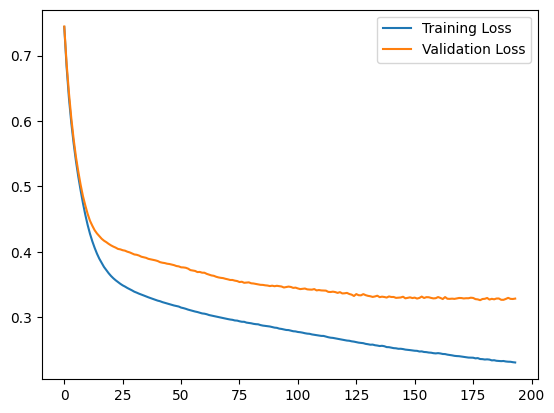

In [70]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

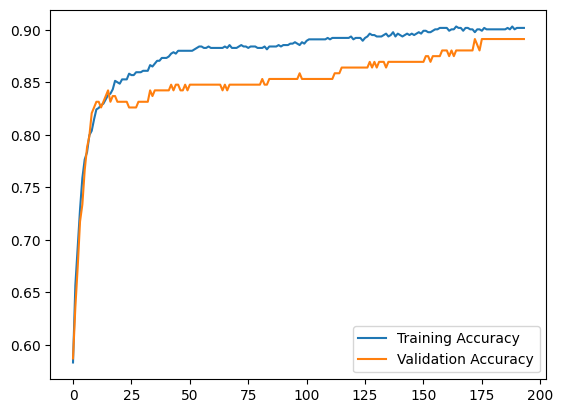

In [74]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

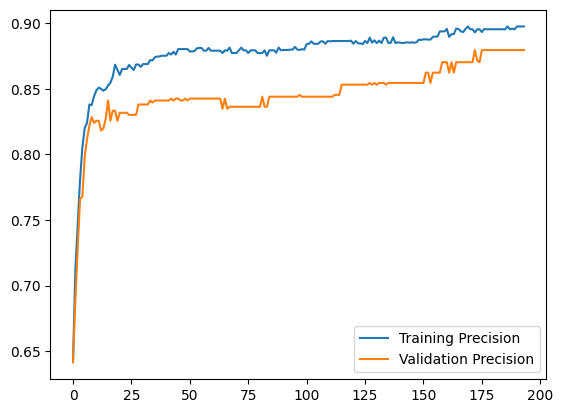

In [75]:
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.legend()
plt.show()

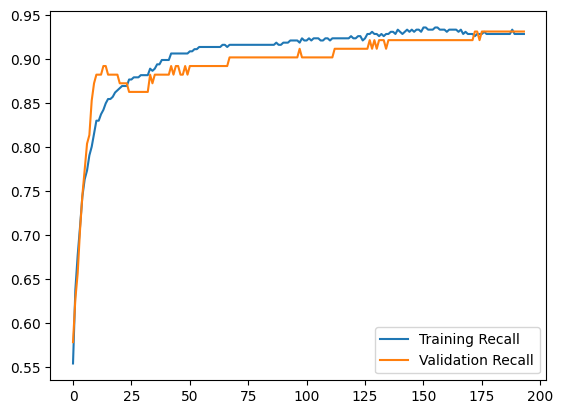

In [76]:
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.legend()
plt.show()